In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import pickle


In [2]:
# Load the dataset
df = pd.read_csv("dataset.csv")


# 1.EXPLORATORY DATA ANALYSIS(EDA)

In [3]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [4]:
df.head()

Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  
0           Fraud  
1           Fraud  
2       Not Fraud  
3           Fraud  
4           Fraud

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
df.describe()

Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000

In [7]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [8]:
# Check for missing values
print(df.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [9]:
# Drop duplicates and missing values
df = df.drop_duplicates().dropna()

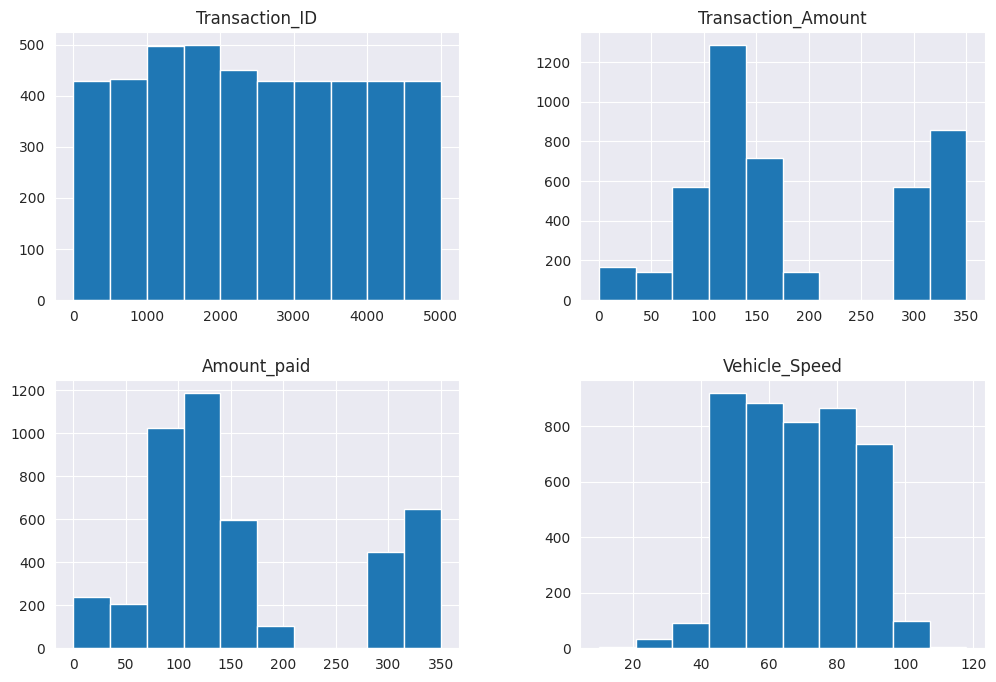

In [10]:
# Analyze feature distributions (histograms)
df.hist(figsize=(12, 8))
plt.show()

**Investigate correlations with the target variable (fraud indicator)**

In [11]:
# Convert date/time columns to numeric representation before calculating correlations
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # Convert to datetime
df['Date_Column_Numeric'] = df['Timestamp'].astype(int)  # Convert to numeric timestamp

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method="spearman")  # Now calculate correlations

print(correlation_matrix)

                     Transaction_ID  Transaction_Amount  Amount_paid  \
Transaction_ID             1.000000           -0.024137     0.087752   
Transaction_Amount        -0.024137            1.000000     0.792911   
Amount_paid                0.087752            0.792911     1.000000   
Vehicle_Speed              0.010776            0.098390     0.075090   
Date_Column_Numeric        0.257582           -0.049760     0.009707   

                     Vehicle_Speed  Date_Column_Numeric  
Transaction_ID            0.010776             0.257582  
Transaction_Amount        0.098390            -0.049760  
Amount_paid               0.075090             0.009707  
Vehicle_Speed             1.000000             0.016562  
Date_Column_Numeric       0.016562             1.000000  


**Visualize categorical feature relationships (boxplots)**

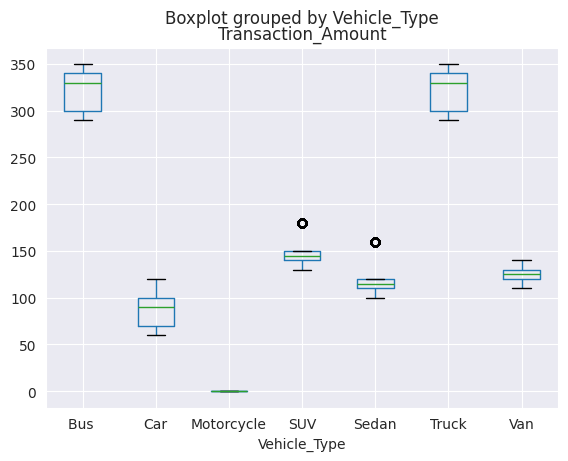

In [12]:
df.boxplot(by="Vehicle_Type", column="Transaction_Amount")
plt.show()

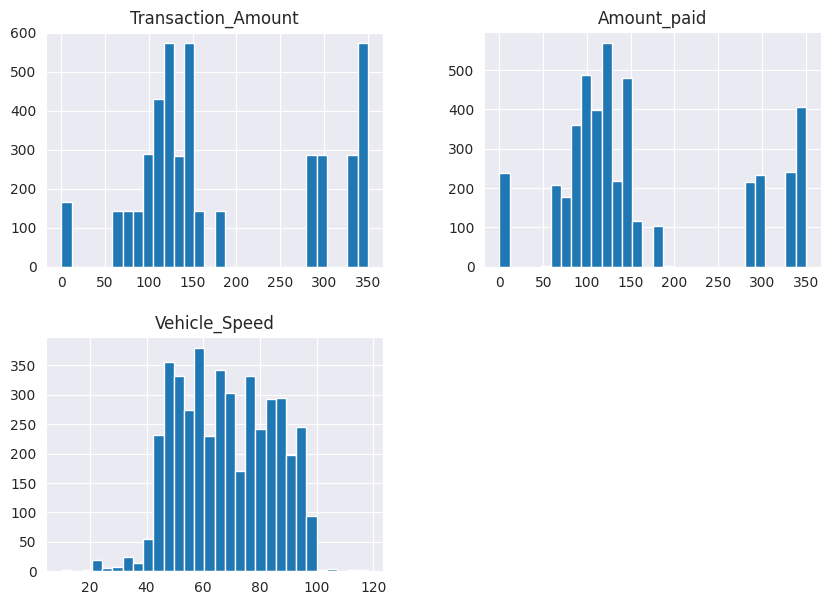

In [13]:
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

**Box plots for numerical features**

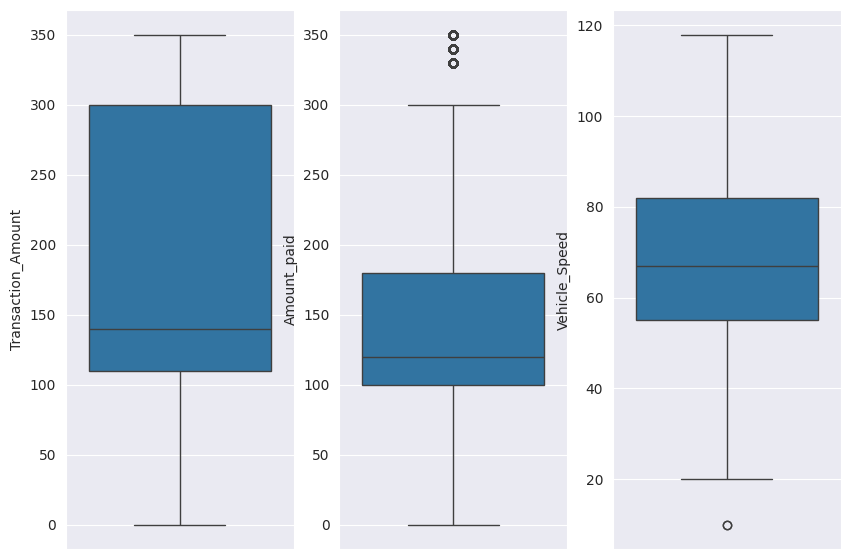

In [14]:
plt.figure(figsize=(10, 7))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=feature, data=df)
plt.show()

**Bar plots for categorical features**

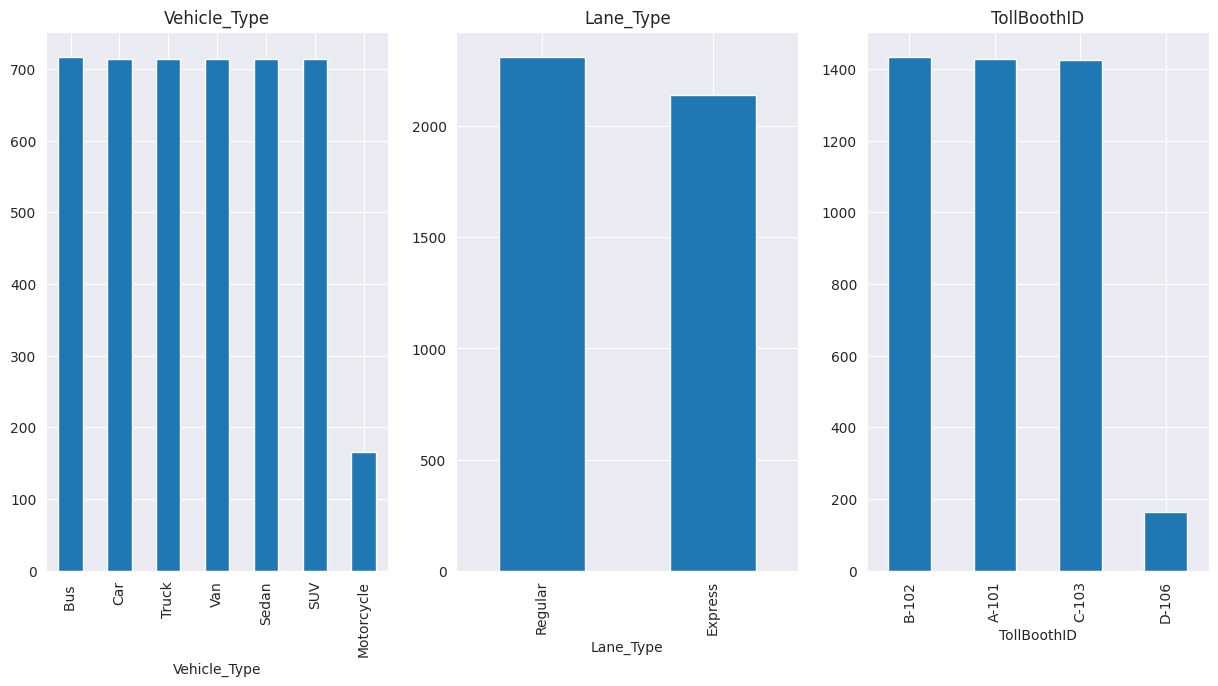

In [15]:
categorical_features = ['Vehicle_Type', 'Lane_Type', 'TollBoothID']
plt.figure(figsize=(15, 7))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
plt.show()

**Count of Fraud and Non_Fraud Indicators bold text**

/tmp/ipykernel_141731/2535894053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])


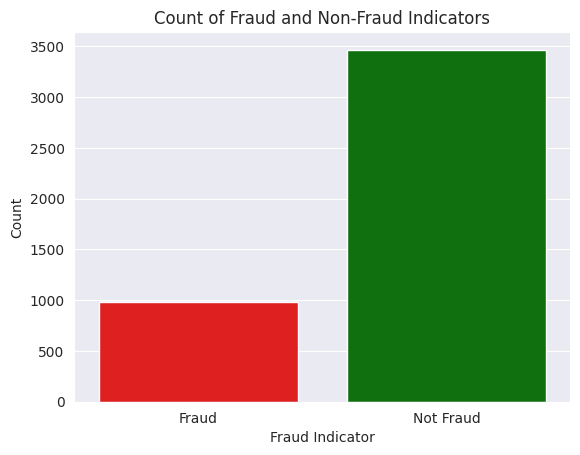

In [16]:
sns.countplot(x='Fraud_indicator', data=df, palette=['red', 'green'])
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Indicators')
plt.show()

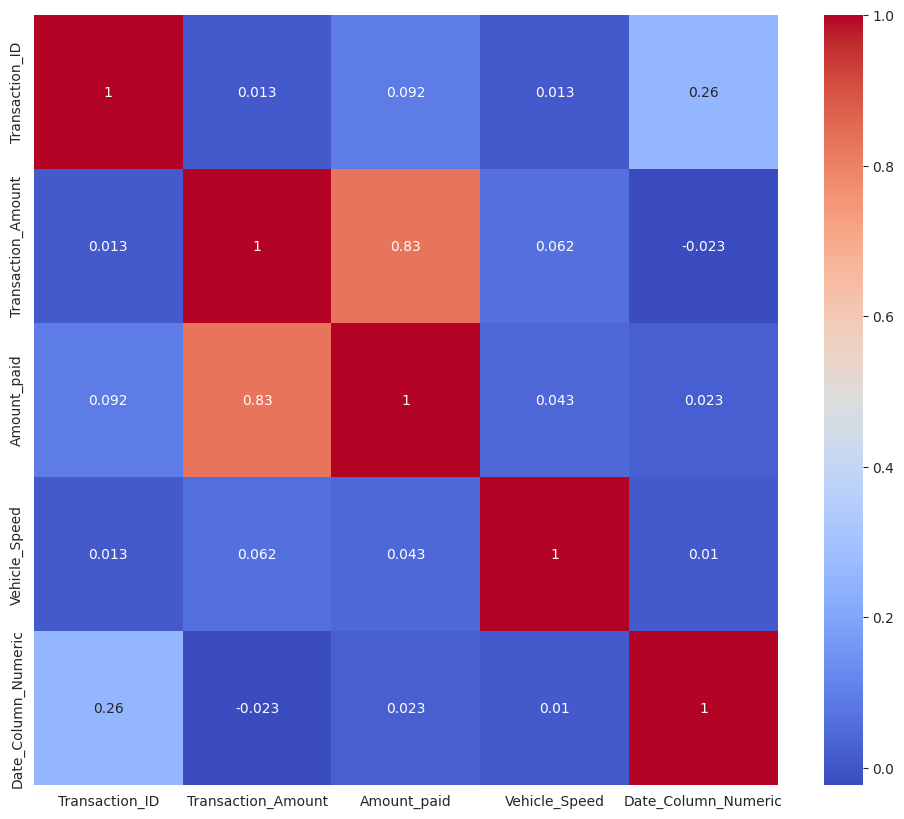

In [17]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Distribution of Transaction Amount by Fraud Indicator**

/tmp/ipykernel_141731/1729941162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


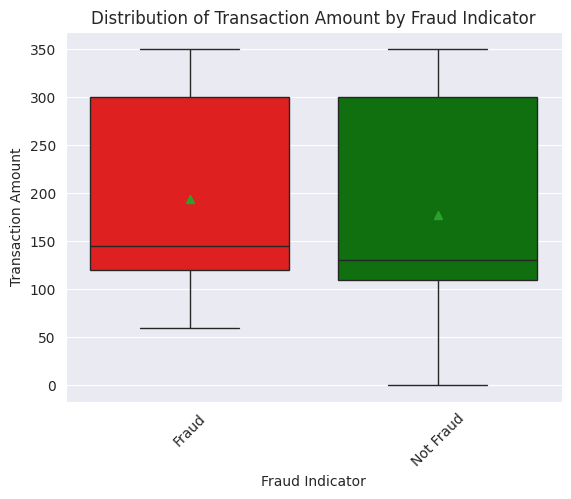

In [18]:

sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

**Uniqueness**


Unique values in categorical columns:
Vehicle_Type: ['Bus ' 'Car' 'Truck' 'Van' 'Sedan' 'SUV' 'Motorcycle']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' 'FTG-044-LMN-322' ...
 'FTG-447-PLN-109' 'FTG-458-VFR-876' 'FTG-459-WSX-543']
TollBoothID: ['A-101' 'B-102' 'C-103' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']
Vehicle_Plate_Number: ['KA11AB1234' 'KA66CD5678' 'KA11GH3456' ... 'KA33WX6789' 'KA35YZ0123'
 'KA37AB3456']
Fraud_indicator: ['Fraud' 'Not Fraud']


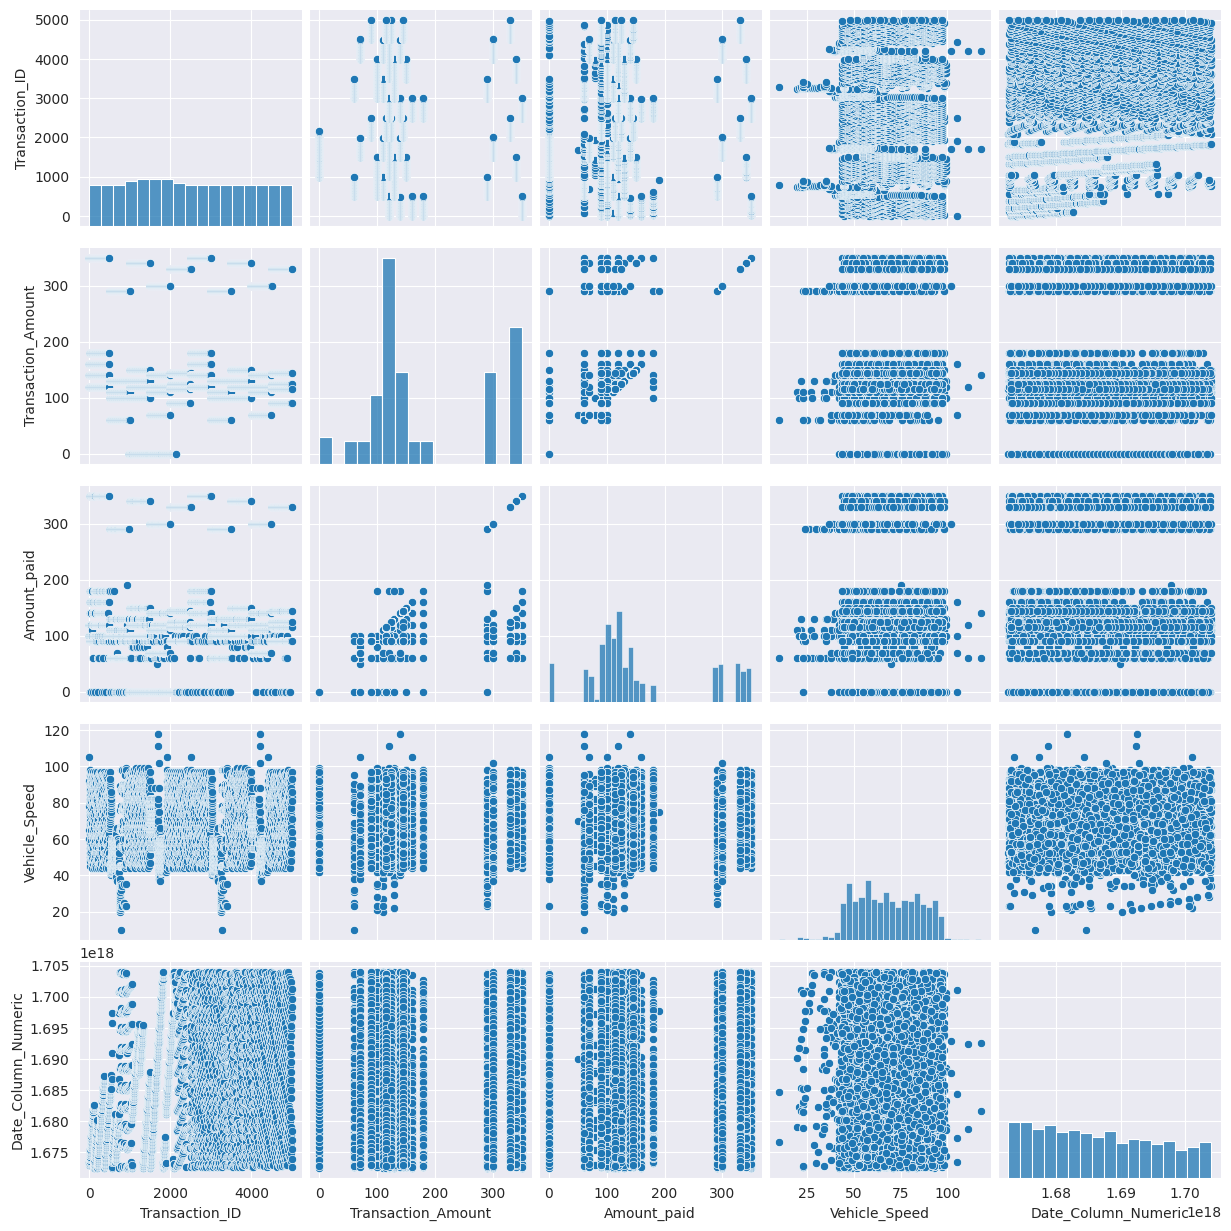

In [19]:
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")
sns.pairplot(df)
plt.show()

# 2.Feature Engineering:

In [20]:
# Extract time-based features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week

In [21]:
# Drop unnecessary columns
df = df.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [22]:
# Define feature columns
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
            'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
            'Month', 'Week']

In [23]:
# Encode target variable
le = LabelEncoder()
df['Fraud_indicator'] = le.fit_transform(df['Fraud_indicator'])


In [24]:
# Define X and y
X = df[features]
y = df['Fraud_indicator']


In [25]:
# Define ColumnTransformer
column_trans = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Geographical_Location']),
    ('ordinal', OrdinalEncoder(), ['Vehicle_Dimensions'])
], remainder='passthrough')


In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [ ]:
df.columns

# 3.Model Development

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, \
    precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [29]:
# Transform the features
X_train_transformed = column_trans.fit_transform(X_train)
X_test_transformed = column_trans.transform(X_test)

**Define models and their hyperparameters**

In [30]:
models = {
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [1, 3, 5, 7], 'criterion': ['gini', 'entropy']}
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {'max_depth': [2, 3, 5, 7], 'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 300]}
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}
    },
    'XGBClassifier': {
        'model': XGBClassifier(),
        'params': {'max_depth': [2, 3, 5, 7], 'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.001]}
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [2, 3, 5, 7]}
    },
    'SVM': {
        'model': svm.SVC(probability=True),
        'params': {'C': [5, 10, 20, 30], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    }
}

In [31]:
# Evaluate each model using GridSearchCV
best_models = {}
for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(models[model_name]['model'], models[model_name]['params'], cv=5, n_jobs=-1, scoring='f1_weighted')
    grid_search.fit(X_train_transformed, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-validation score for {model_name}: {grid_search.best_score_}")


Training DecisionTreeClassifier...
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 7}
Best Cross-validation score for DecisionTreeClassifier: 0.9925669264978341
Training RandomForestClassifier...
Best Parameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}
Best Cross-validation score for RandomForestClassifier: 0.9590740385469838
Training AdaBoostClassifier...
Best Parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 300}
Best Cross-validation score for AdaBoostClassifier: 0.9639573170890389
Training XGBClassifier...
Best Parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Cross-validation score for XGBClassifier: 0.9967805592764452
Training KNeighborsClassifier...
Best Parameters for KNeighborsClassifier: {'n_neighbors': 2}
Best Cross-validation score for KNeighborsClassifier: 0.9974242737273201
Training SVM...
Best Parameters for SVM: {'C': 20, '

**Model Evaluation**


Evaluating DecisionTreeClassifier...
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       287
           1       0.99      1.00      0.99      1049

    accuracy                           0.99      1336
   macro avg       0.99      0.98      0.98      1336
weighted avg       0.99      0.99      0.99      1336

[[ 275   12]
 [   2 1047]]
F1 Score: 0.9894529141885796
Accuracy: 0.9895209580838323
ROC AUC Score: 0.9939630575660244

Evaluating RandomForestClassifier...
              precision    recall  f1-score   support

           0       1.00      0.78      0.87       287
           1       0.94      1.00      0.97      1049

    accuracy                           0.95      1336
   macro avg       0.97      0.89      0.92      1336
weighted avg       0.95      0.95      0.95      1336

[[ 223   64]
 [   0 1049]]
F1 Score: 0.9497990903973192
Accuracy: 0.9520958083832335
ROC AUC Score: 0.9955391396485122

Evaluating AdaBoostClassifier..

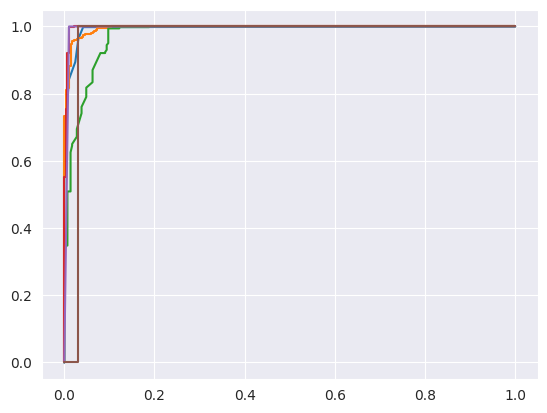

In [32]:

for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_transformed)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'ROC AUC Score: {roc_auc}')
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_transformed)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')


In [33]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Iterate over the best_models dictionary
for model_name, model in best_models.items():
    # Get the best cross-validation score
    best_score = cross_val_score(model, X_train_transformed, y_train, cv=5).mean()
    # Get the best parameters
    best_params = model.get_params()
    # Append the results to the list
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Score': best_score
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                    Model                                    Best Parameters  \
0  DecisionTreeClassifier  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...   
1  RandomForestClassifier  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   
2      AdaBoostClassifier  {'algorithm': 'SAMME.R', 'base_estimator': 'de...   
3           XGBClassifier  {'objective': 'binary:logistic', 'base_score':...   
4    KNeighborsClassifier  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
5                     SVM  {'C': 20, 'break_ties': False, 'cache_size': 2...   

   Best Score  
0    0.993258  
1    0.960835  
2    0.965008  
3    0.996790  
4    0.997432  
5    0.993258  


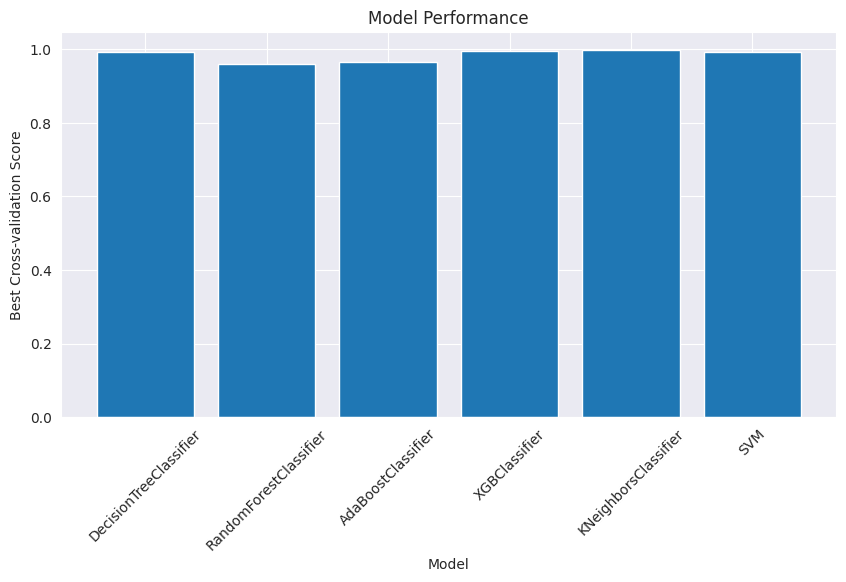

In [34]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar plot of the best scores
plt.bar(results_df['Model'], results_df['Best Score'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Best Cross-validation Score')
plt.title('Model Performance')
# Tilt the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


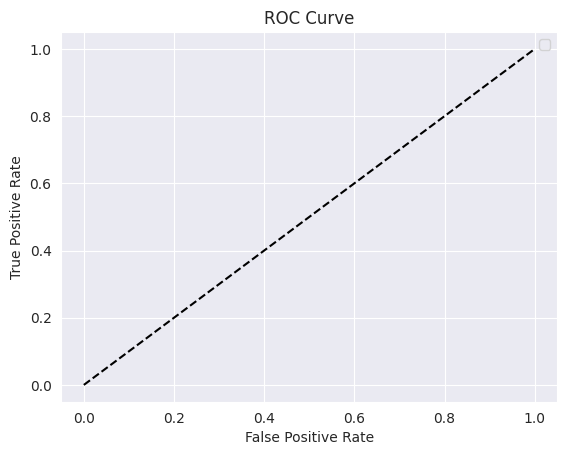

In [35]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

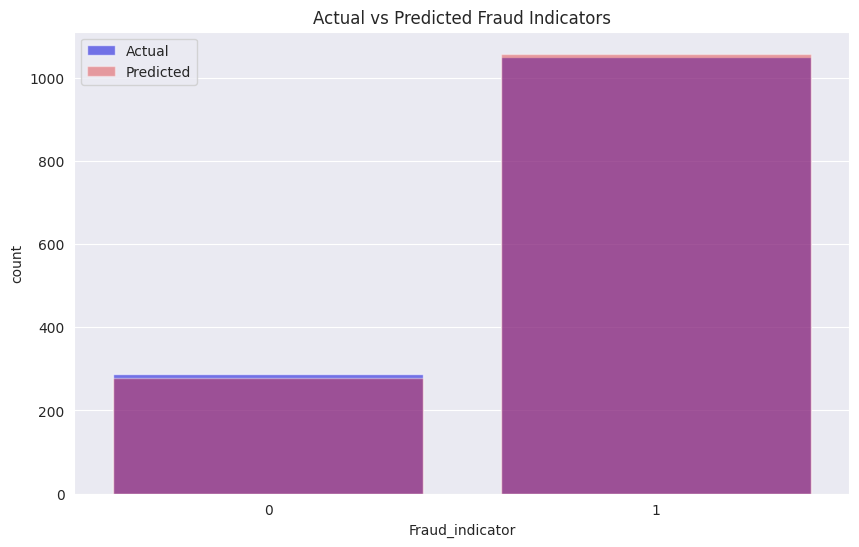

In [36]:
# Visualization: Predicted vs Actual
best_model = best_models['SVM']
y_pred_final = best_model.predict(X_test_transformed)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, label='Actual', color='blue', alpha=0.6)
sns.countplot(x=y_pred_final, label='Predicted', color='red', alpha=0.4)
plt.legend()
plt.title('Actual vs Predicted Fraud Indicators')
plt.show()

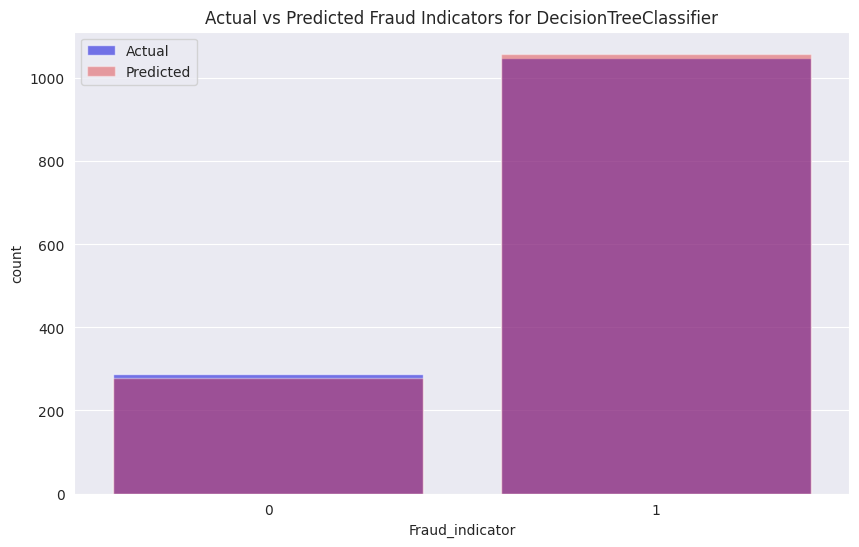

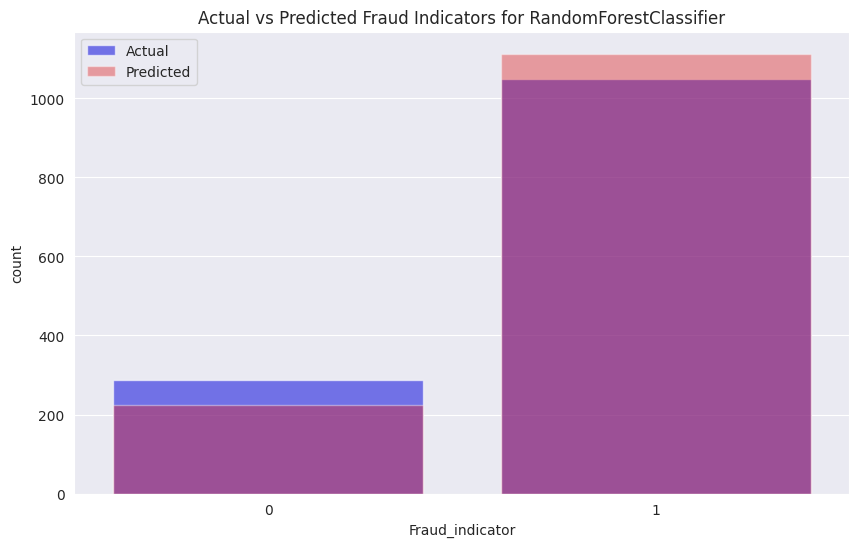

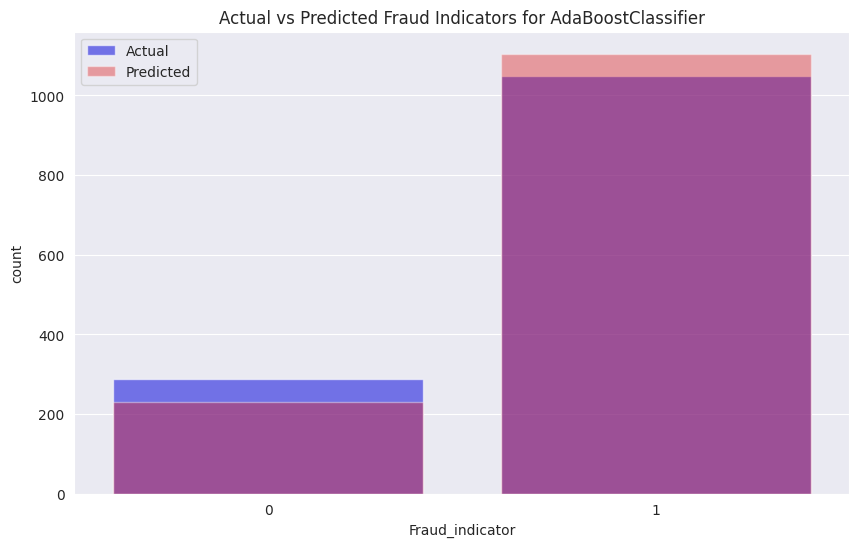

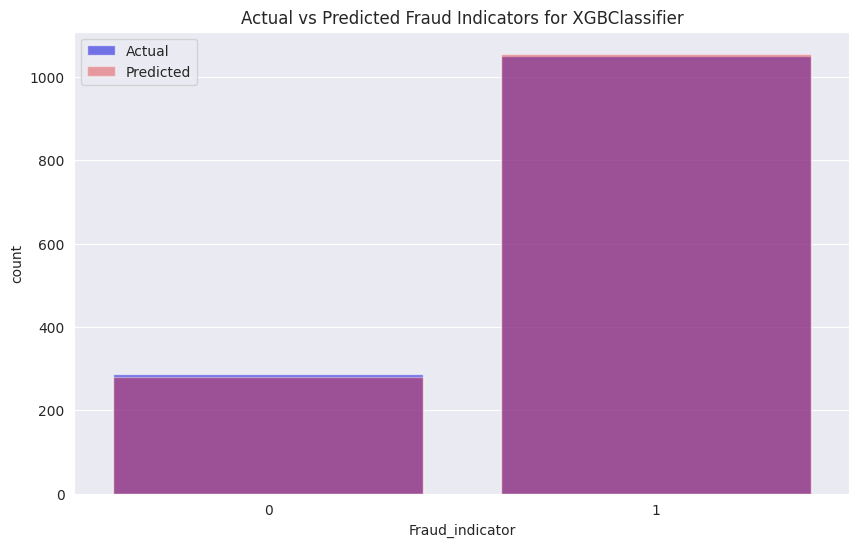

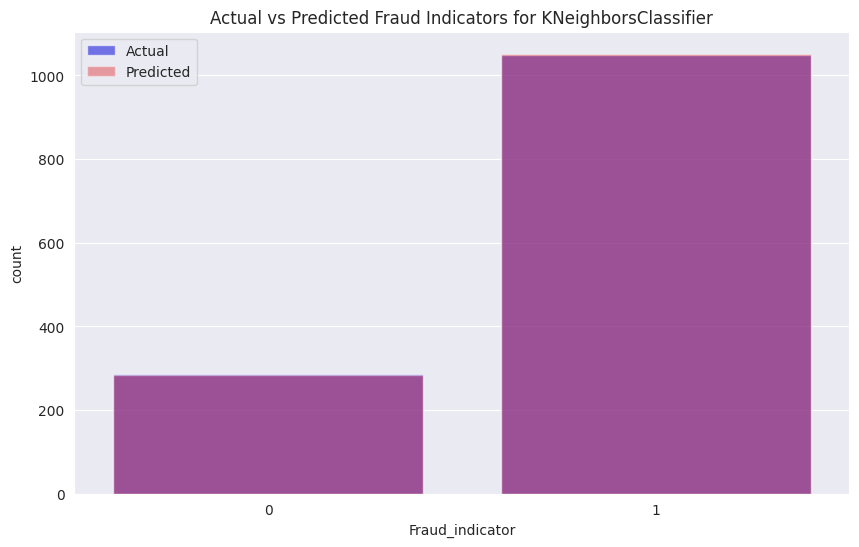

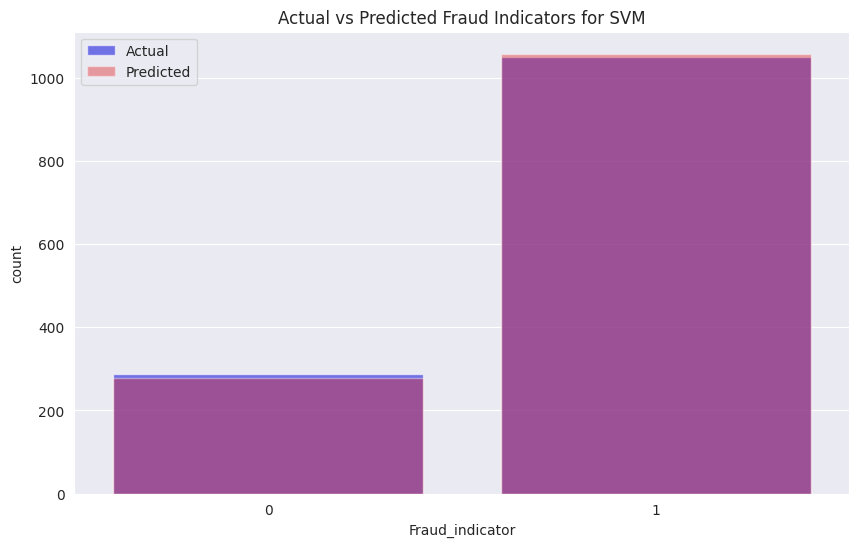

In [37]:
# Iterate over each model in the best_models dictionary
for model_name, model in best_models.items():
    # Generate predictions
    y_pred_final = model.predict(X_test_transformed)

    # Create a new figure for each model
    plt.figure(figsize=(10, 6))

    # Create countplots for actual and predicted values
    sns.countplot(x=y_test, label='Actual', color='blue', alpha=0.6)
    sns.countplot(x=y_pred_final, label='Predicted', color='red', alpha=0.4)

    # Add legend and title
    plt.legend()
    plt.title(f'Actual vs Predicted Fraud Indicators for {model_name}')

    # Display the plot
    plt.show()

In [38]:
# Define the model
model = svm.SVC(gamma='auto', C=5, kernel='poly')


In [39]:
# Create pipeline
pipe = make_pipeline(column_trans, model)

In [40]:
# Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle_Type',
                                                   'TollBoothID', 'Lane_Type',
                                                   'Geographical_Location']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Vehicle_Dimensions'])])),
                ('svc', SVC(C=5, gamma='auto', kernel='poly'))])

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Predict the test set results
y_pred = pipe.predict(X_test)

# Create a DataFrame from the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index = ['Actual Negative', 'Actual Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])

# Print the confusion matrix in tabular format
print("Confusion Matrix:")
print(cm_df)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 287                   0
Actual Positive                   0                1049

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       287
    Positive       1.00      1.00      1.00      1049

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



In [42]:
# Save the model
with open('SVM_Fast.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [43]:
# Load the model and make a prediction
def predict_fraud(input_data):
    with open('SVM_Fast.pkl', 'rb') as f:
        model = pickle.load(f)
    return model.predict(input_data)

In [44]:
# Example prediction
example_data = pd.DataFrame([[150, 100, 'Car', 'B-102', 'Regular', 'Small', '13.059816123454882, 77.77068662374292', 1, 1]],
                            columns=features)

In [45]:
print(predict_fraud(example_data))

[0]


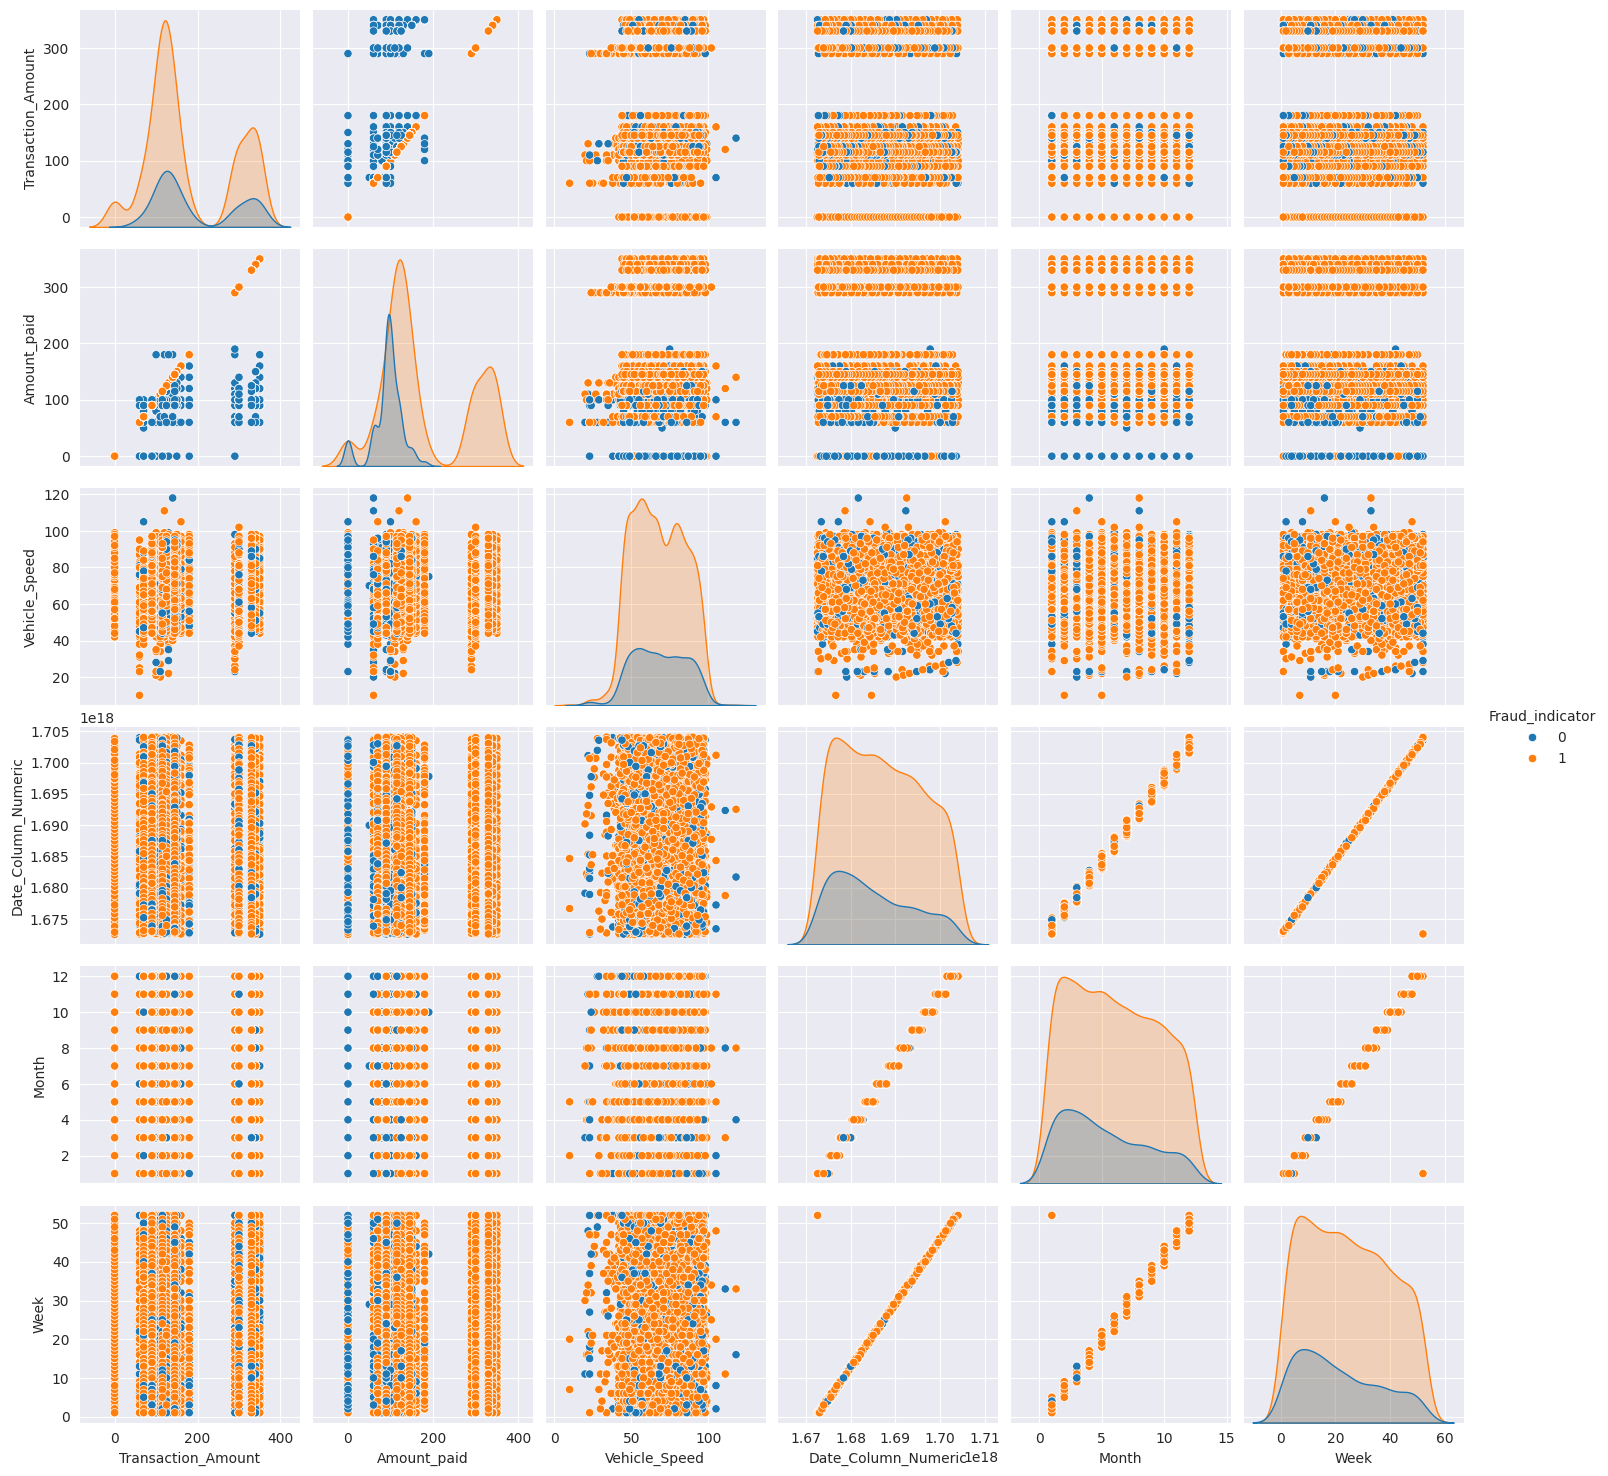

In [46]:
# Visualize the data
sns.pairplot(df, hue='Fraud_indicator')
plt.show()


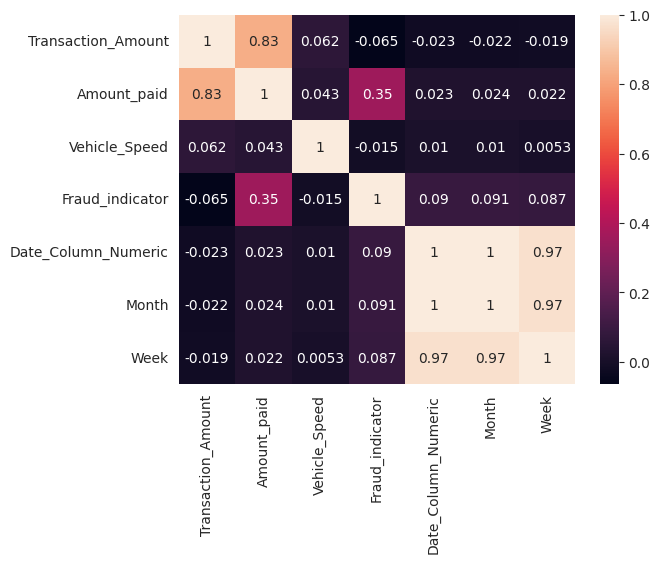

In [47]:
import numpy as np

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Correlation heatmap
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [48]:
# Cross-validation
scores = cross_val_score(pipe, X, y, cv=5)
print(scores)


[1. 1. 1. 1. 1.]


In [49]:
# Hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
1.0


In [50]:
# Save the best model
with open('SVM_Fast_best.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

# 4.Model Deployment

In [51]:
# Load the best model and make a prediction
def predict_fraud_best(input_data):
    with open('SVM_Fast_best.pkl', 'rb') as f:
        model = pickle.load(f)
    return model.predict(input_data)

In [53]:
import numpy as np

# Transform the test data
X_test_transformed = column_trans.transform(X_test)

# Make predictions
y_pred_prob = model.predict(X_test_transformed)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


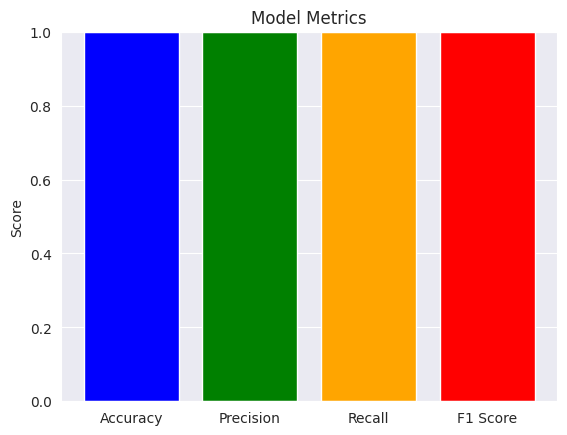

In [54]:
#Accuracy metrics
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)  
plt.show()

In [55]:
# Create a sample input where Fraud_indicator is 1
sample_data = pd.DataFrame([[200, 150, 'Truck', 'C-103', 'Regular', 'Large', '13.059816123454882, 77.77068662374292', 9, 1]],
                            columns=features)

In [56]:
print(sample_data)

   Transaction_Amount  Amount_paid Vehicle_Type TollBoothID Lane_Type  \
0                 200          150        Truck       C-103   Regular   

  Vehicle_Dimensions                  Geographical_Location  Month  Week  
0              Large  13.059816123454882, 77.77068662374292      9     1  


In [57]:
# Predict the sample data
print(predict_fraud(sample_data))


[0]


In [58]:
# Load the dataset
testing = pd.read_csv("dataset.csv")


In [59]:

# Preprocess the data in the same way as it was done while training
testing = testing.drop_duplicates().dropna()
testing['Timestamp'] = pd.to_datetime(testing['Timestamp'])
testing['Month'] = testing['Timestamp'].dt.month
testing['Week'] = testing['Timestamp'].dt.isocalendar().week
testing = testing.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [60]:

# Define the feature columns
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
            'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
            'Month', 'Week']

# Define X
X = testing[features]



In [61]:
# Load the model
with open('SVM_Fast_best.pkl', 'rb') as f:
    model = pickle.load(f)



In [62]:
# Make predictions
predictions = model.predict(X)


In [63]:

# Print whether each transaction is a fraud or not
for i, prediction in enumerate(predictions):
    print(f'Transaction {i+1} is {"a fraud" if prediction == 1 else "not a fraud"}')

Transaction 1 is not a fraud
Transaction 2 is not a fraud
Transaction 3 is not a fraud
Transaction 4 is not a fraud
Transaction 5 is not a fraud
Transaction 6 is not a fraud
Transaction 7 is not a fraud
Transaction 8 is not a fraud
Transaction 9 is not a fraud
Transaction 10 is not a fraud
Transaction 11 is not a fraud
Transaction 12 is a fraud
Transaction 13 is not a fraud
Transaction 14 is not a fraud
Transaction 15 is not a fraud
Transaction 16 is not a fraud
Transaction 17 is a fraud
Transaction 18 is not a fraud
Transaction 19 is a fraud
Transaction 20 is not a fraud
Transaction 21 is not a fraud
Transaction 22 is a fraud
Transaction 23 is not a fraud
Transaction 24 is not a fraud
Transaction 25 is a fraud
Transaction 26 is a fraud
Transaction 27 is a fraud
Transaction 28 is not a fraud
Transaction 29 is a fraud
Transaction 30 is not a fraud
Transaction 31 is a fraud
Transaction 32 is not a fraud
Transaction 33 is a fraud
Transaction 34 is not a fraud
Transaction 35 is not a fraud

In [64]:
# Save the predictions to a CSV file
testing['Fraud_indicator'] = predictions

testing.to_csv('predictions.csv', index=False)

In [65]:
# Load the original dataset
original_df = pd.read_csv("dataset.csv")


In [66]:
# Preprocess the original dataset in the same way as it was done while training
original_df = original_df.drop_duplicates().dropna()
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'])
original_df['Month'] = original_df['Timestamp'].dt.month
original_df['Week'] = original_df['Timestamp'].dt.isocalendar().week

In [67]:
original_df = original_df.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [68]:
# Load the predicted results
predicted_df = pd.read_csv('predictions.csv')

In [69]:
# Compare the 'Fraud_indicator' column in the original dataset with the 'Fraud_indicator' column in the predicted results
comparison_df = pd.DataFrame({
    'Actual': original_df['Fraud_indicator'],
    'Predicted': predicted_df['Fraud_indicator']
})

In [70]:
# Display the comparison DataFrame
print(comparison_df.head(50))

       Actual  Predicted
0       Fraud        0.0
1       Fraud        0.0
2         NaN        0.0
3       Fraud        0.0
4       Fraud        0.0
5       Fraud        0.0
6       Fraud        0.0
7       Fraud        0.0
8       Fraud        0.0
9         NaN        0.0
10      Fraud        0.0
11      Fraud        1.0
12      Fraud        0.0
13  Not Fraud        0.0
14      Fraud        0.0
15      Fraud        0.0
16        NaN        1.0
17      Fraud        0.0
18      Fraud        1.0
19  Not Fraud        0.0
20      Fraud        0.0
21  Not Fraud        1.0
22      Fraud        0.0
23        NaN        0.0
24      Fraud        1.0
25  Not Fraud        1.0
26      Fraud        1.0
27      Fraud        0.0
28  Not Fraud        1.0
29  Not Fraud        0.0
30        NaN        1.0
31  Not Fraud        0.0
32      Fraud        1.0
33  Not Fraud        0.0
34      Fraud        0.0
35  Not Fraud        1.0
36      Fraud        0.0
37        NaN        0.0
38  Not Fraud        0.0


In [ ]:
# Calculate the accuracy of the model
accuracy = (comparison_df['Actual'] == comparison_df['Predicted']).mean()
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
from sklearn.metrics import confusion_matrix as cm

# Map 'Fraud' to 1 and 'Not Fraud' to 0 in 'Actual' column
comparison_df['Actual'] = comparison_df['Actual'].map({'Fraud': 1, 'Not Fraud': 0})

# Calculate the confusion matrix
confusion_mat = cm(comparison_df['Actual'], comparison_df['Predicted'])
cm_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

In [77]:
print(original_df['Vehicle_Type'].unique())

['Bus ' 'Car' 'Truck' 'Van' 'Sedan' 'SUV' 'Motorcycle']


# 5. Explanatory Analysis

**Feature Importance Using SHAP Values**

  0%|          | 0/4451 [00:00<?, ?it/s]

IndexError: list index out of range

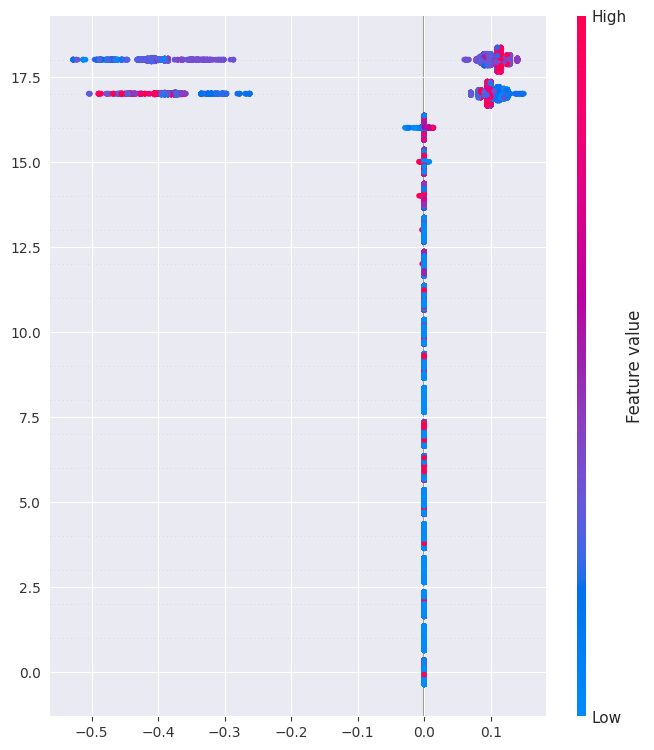

In [89]:
import shap
import pickle

# Load the best model
with open('SVM_Fast_best.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare the data
X_transformed = model.named_steps['columntransformer'].transform(X)

# Use a sample of the data for the SHAP KernelExplainer initialization
# Typically, 100 samples are sufficient; adjust this based on your data size
sample_size = min(100, X_transformed.shape[0])
X_sample = shap.sample(X_transformed, sample_size, random_state=42)

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(model.named_steps['svc'].predict, X_sample)

# Calculate SHAP values
shap_values = explainer.shap_values(X_transformed)

# Plot feature importance
shap.summary_plot(shap_values, X_transformed, feature_names=features)


In [92]:
print("Length of SHAP values: ", len(shap_values[0]))
print("Number of features in transformed data: ", X_transformed.shape[1])
print("Number of feature names: ", len(features))

Length of SHAP values:  19
Number of features in transformed data:  19
Number of feature names:  9


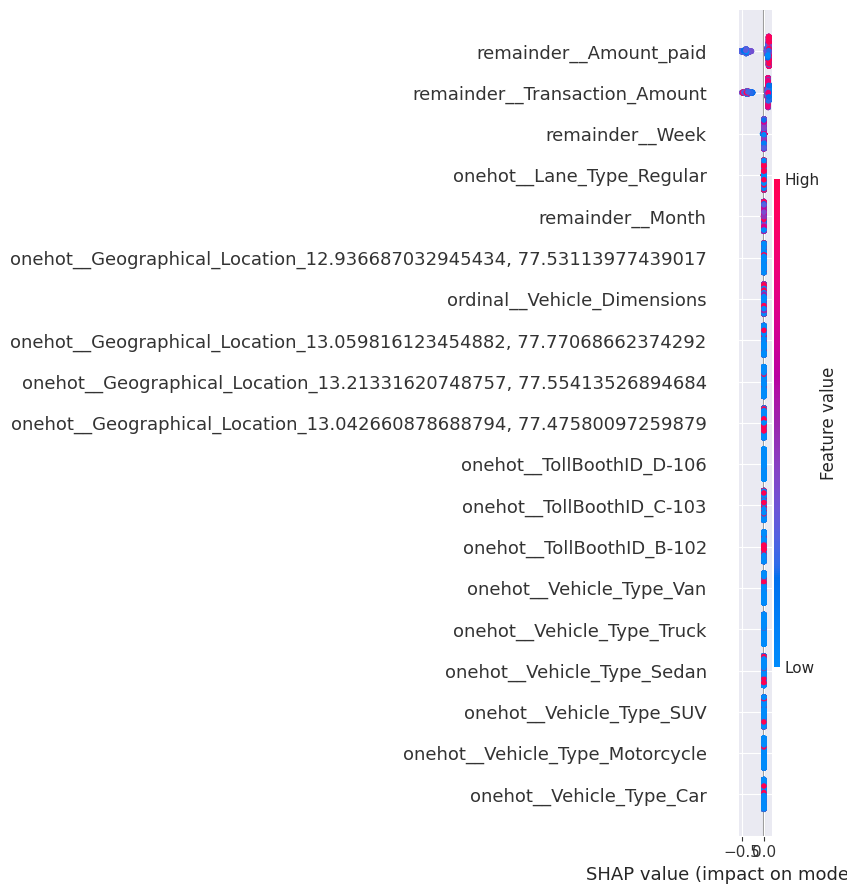

In [93]:
# Get feature names after transformation
feature_names_after_transform = column_trans.get_feature_names_out()

# Plot feature importance
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names_after_transform)

**Correlation Analysis**

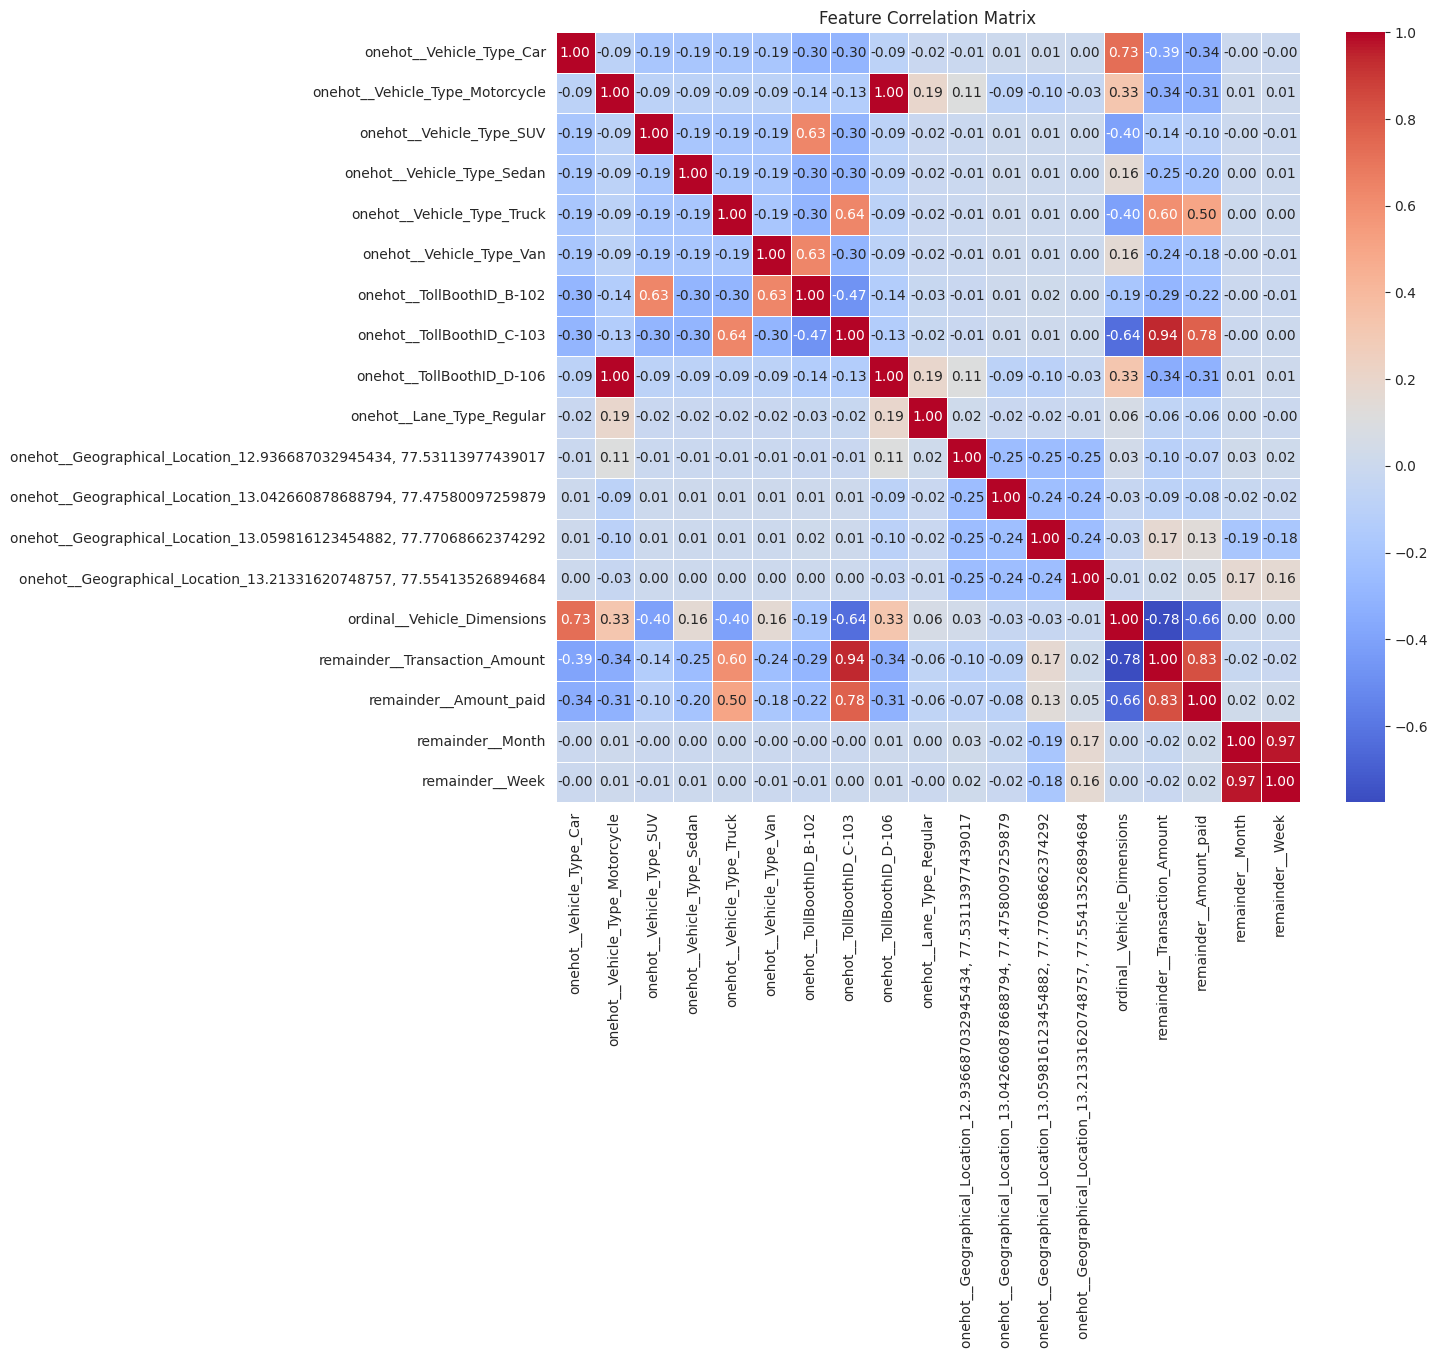

In [94]:
# Get feature names after transformation
feature_names_after_transform = column_trans.get_feature_names_out()
# Convert the transformed data back to a DataFrame if necessary
import pandas as pd

# Convert the transformed data back to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names_after_transform)

# Calculate the correlation matrix
correlation_matrix = X_transformed_df.corr()

# Plot the heatmap`
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

**Pairplot Analysis**

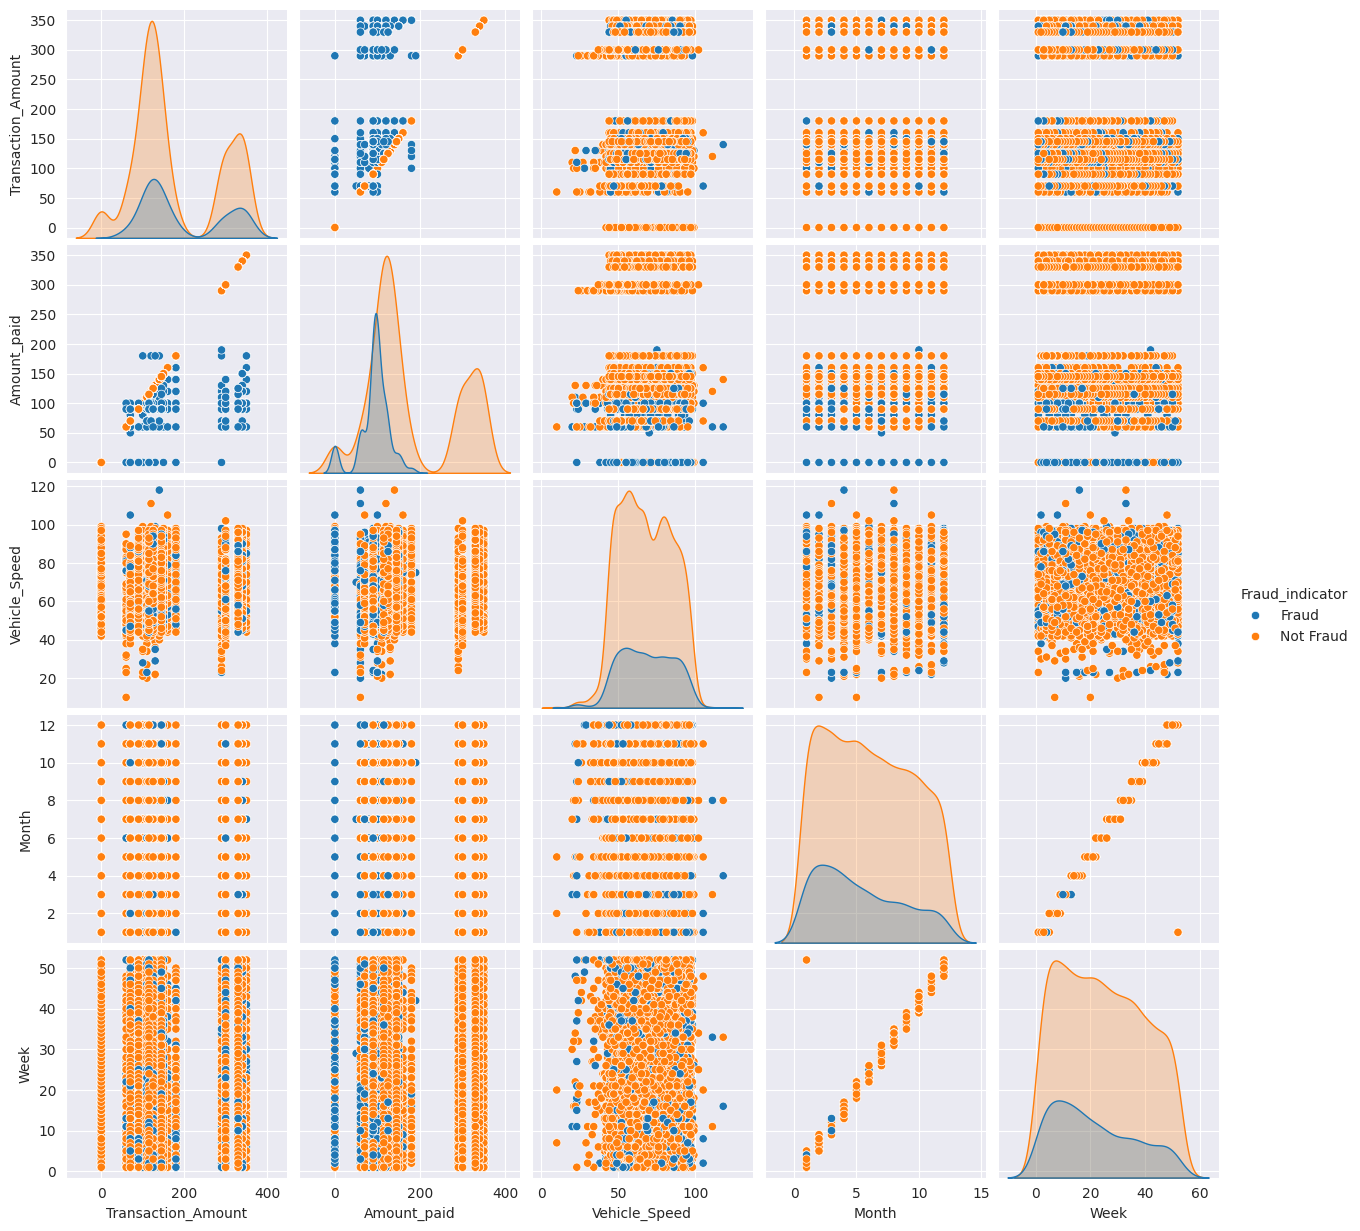

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset.csv")

# Preprocess the data
df = df.drop_duplicates().dropna()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df = df.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])

# Pairplot analysis
sns.pairplot(df, hue='Fraud_indicator')
plt.show()
